<div style="text-align: center;">
    <h1 style="color: blue; font-family: 'Times New Roman'; font-size: 30px;">Homework - Principal Components Analysis</h1>
</div>

In [2]:
# Import necessary library  

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import yaml
import matplotlib.pyplot as plt
import scipy

## <span style="color: blue;">0. Preparation (Setting the Random State):</span>

Before starting with the exercises, initialize a random state variable rs equal to the minimum of the ID student numbers of the group members.

The random state rs must be used to set the numpy random seed at the beginning of the code and in every python functions you call during the exercises (if a random procedure is used).

In [3]:
# Setting the random state

rs = 314415
np.random.seed(rs)

## <span style="color: blue;">1. Exercise 1 (Loading and Preparing the Data):</span>

Load the file cla4lsp customers.csv as a pandas DataFrame (DF).

### <span style="color: blue;">1.1. Store in the variable df tot the df obtained from the csv file.</span>

In [4]:
# Read the csv file 

df_tot = pd.read_csv('cla4lsp customers.csv', delimiter='\t')

In [5]:
# Big picture of the csv file

df_tot.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Total information of the csv file

df_tot.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

### <span style="color: blue;">1.2. Create a sub-DFs workdf, extracted from df tot, such that it contains 2/3 of the original dataframe’s rows (randomly sampled);</span>

In [7]:
workdf = df_tot.sample(frac =2/3, random_state=rs)

In [8]:
workdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
656,2564,1953,Graduation,Together,61278.0,0,1,04-01-2014,87,111,...,6,0,0,0,0,0,0,3,11,0
688,10767,1989,PhD,Together,77845.0,0,0,16-05-2014,40,760,...,1,0,0,1,1,0,0,3,11,0
1387,8702,1976,2n Cycle,Together,26907.0,1,1,20-08-2013,10,9,...,7,0,0,0,0,0,0,3,11,0
690,7230,1960,PhD,Divorced,50611.0,0,1,04-10-2012,98,459,...,6,0,1,0,0,0,0,3,11,1
371,10313,1975,Graduation,Married,48178.0,1,1,28-10-2012,69,159,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,405,1964,Graduation,Divorced,41638.0,0,1,13-02-2013,68,315,...,8,1,0,0,0,0,0,3,11,0
1798,8439,1964,Graduation,Together,63404.0,0,2,06-06-2014,97,734,...,4,0,0,0,1,0,0,3,11,0
1084,6072,1970,Master,Single,75345.0,0,0,02-02-2013,16,918,...,3,0,0,0,1,0,0,3,11,1
1122,675,1973,Master,Divorced,52034.0,1,1,17-05-2013,67,146,...,7,0,0,0,0,0,0,3,11,0


### 1.3. Discard 'ID', 'Z_CostContact', and 'Z_Revenue' columns

In [9]:
workdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
# Drop the columns 'ID', 'Z CostComtact', 'Z revenue'
workdf = workdf.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

### 1.4. Remove randomly from workdf one feature column

In [11]:
workdf.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [12]:
# Remove randomly from workdf one feature column among the list

# List of feature
features_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Randomly select a feature to drop
droped_feature = np.random.choice(features_list)

# Print the feature to drop
print("Dropping feature:", droped_feature)

# Drop the randomly selected feature
workdf = workdf.drop(columns=[droped_feature])

Dropping feature: NumStorePurchases


In [13]:
workdf.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')

### 1.5. Clean the dataset workdf from missing values in the feature columns (if needed).

In [14]:
# Check for missing values in the entire DataFrame
missing_values = workdf.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


Year_Birth              0
Education               0
Marital_Status          0
Income                 14
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [15]:
# Access the data of the column
income_data = workdf['Income']

# Print the rows of the column data
print(income_data)

656     61278.0
688     77845.0
1387    26907.0
690     50611.0
371     48178.0
         ...   
2007    41638.0
1798    63404.0
1084    75345.0
1122    52034.0
20      37040.0
Name: Income, Length: 1493, dtype: float64


In [16]:
# Fill missing values with the mean of the column
workdf = workdf.fillna(workdf.mean())

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/1739981737.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  workdf = workdf.fillna(workdf.mean())


# Exercise 2 (Encoding of Categorical Data)

In [17]:
# Get unique data types in the workdf

# Get the data types of each column
data_types = workdf.dtypes

# Get unique data types
unique_data_types = data_types.unique()

# Print the unique data types
print("Unique data types in DataFrame:", unique_data_types)

Unique data types in DataFrame: [dtype('int64') dtype('O') dtype('float64')]


In [18]:
# Get the list of categorical features

# Get the data types of each column
data_types = workdf.dtypes

# Filter columns with object or categorical dtype
categorical_features = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical features
print("Categorical features:", categorical_features)


Categorical features: ['Education', 'Marital_Status', 'Dt_Customer']


In [19]:
# Get the unique values in the column 'Education'
education_unique_values = workdf['Education'].unique()

# Print the unique values
print("Unique values in 'Education':", education_unique_values)

Unique values in 'Education': ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [20]:
# Get the unique values in the column 'Marital_Status'
Marital_Status_unique_values = workdf['Marital_Status'].unique()

# Print the unique values
print("Unique values in 'Marital_Status':", Marital_Status_unique_values)

Unique values in 'Marital_Status': ['Together' 'Divorced' 'Married' 'Single' 'Widow' 'Alone' 'YOLO' 'Absurd']


In [21]:
# Get the unique values in the column 'Dt_Customer'
dt_Customer_unique_values = workdf['Dt_Customer'].unique()

# Print the unique values
print("Unique values in 'Dt_Customer':", dt_Customer_unique_values)

Unique values in 'Dt_Customer': ['04-01-2014' '16-05-2014' '20-08-2013' '04-10-2012' '28-10-2012'
 '10-02-2014' '13-02-2014' '20-11-2013' '05-04-2014' '09-02-2014'
 '28-12-2012' '23-05-2014' '12-01-2014' '20-04-2014' '24-03-2013'
 '11-12-2012' '04-08-2012' '08-03-2014' '27-08-2012' '03-04-2013'
 '17-11-2013' '20-01-2013' '11-04-2014' '19-02-2013' '08-06-2013'
 '29-03-2014' '12-03-2014' '24-10-2013' '28-10-2013' '26-11-2012'
 '30-07-2013' '14-10-2012' '09-12-2013' '14-09-2012' '08-09-2012'
 '11-02-2014' '12-12-2012' '07-06-2014' '22-09-2013' '06-09-2012'
 '07-11-2012' '11-05-2014' '29-11-2013' '02-05-2014' '28-06-2013'
 '16-12-2013' '19-11-2012' '21-08-2013' '10-10-2012' '23-10-2013'
 '23-03-2014' '25-03-2014' '28-06-2014' '24-06-2013' '19-07-2013'
 '04-10-2013' '05-04-2013' '01-12-2013' '30-08-2012' '09-09-2013'
 '25-08-2012' '15-10-2013' '20-03-2013' '24-12-2012' '25-11-2013'
 '09-03-2013' '26-01-2014' '22-05-2013' '07-07-2013' '24-03-2014'
 '09-06-2013' '02-06-2013' '08-07-2013' '07-

In [22]:
# One-hot encoding for 'Marital_Status' feature
workdf = pd.get_dummies(workdf, columns=['Marital_Status'])

In [23]:
workdf.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [24]:
# One-hot encoding for 'Marital_Status' feature
workdf = pd.get_dummies(workdf, columns=['Education'])

In [25]:
workdf.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [26]:
# Get the list of categorical features

# Get the data types of each column
data_types = workdf.dtypes

# Filter columns with object or categorical dtype
categorical_features = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical features
print("Categorical features:", categorical_features)

Categorical features: ['Dt_Customer']


In [27]:
# Converted to the datetime datatype
workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/2456925608.py:2: UserWarning: Parsing '16-05-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/2456925608.py:2: UserWarning: Parsing '20-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/2456925608.py:2: UserWarning: Parsing '28-10-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/2456925608.py:2: UserWarning: Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or specify inf

In [28]:
workdf['Dt_Customer']

656    2014-04-01
688    2014-05-16
1387   2013-08-20
690    2012-04-10
371    2012-10-28
          ...    
2007   2013-02-13
1798   2014-06-06
1084   2013-02-02
1122   2013-05-17
20     2012-08-08
Name: Dt_Customer, Length: 1493, dtype: datetime64[ns]

In [29]:
# # Calculate the mean of each column
# column_means = workdf.mean()
# print(column_means)

In [30]:
# # Identify columns with a mean greater than 1
# columns_to_scale = column_means[column_means > 1].index

# # Remove 'Year_Birth' from the list of columns to scale
# columns_to_scale = [col for col in columns_to_scale if col != 'Year_Birth']

# # Initialize the Min-Max scaler
# scaler = MinMaxScaler()

# # Scale the selected columns
# workdf[columns_to_scale] = scaler.fit_transform(workdf[columns_to_scale])

In [31]:
# # Calculate the mean of each column
# column_means = workdf.mean()
# print(column_means)

In [32]:
Xworkdf = workdf
Xworkdf.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
656,1953,61278.0,0,1,2014-04-01,87,111,3,28,2,...,0,0,1,0,0,0,0,1,0,0
688,1989,77845.0,0,0,2014-05-16,40,760,40,480,0,...,0,0,1,0,0,0,0,0,0,1
1387,1976,26907.0,1,1,2013-08-20,10,9,1,7,0,...,0,0,1,0,0,1,0,0,0,0
690,1960,50611.0,0,1,2012-04-10,98,459,0,24,6,...,0,0,0,0,0,0,0,0,0,1
371,1975,48178.0,1,1,2012-10-28,69,159,4,45,6,...,1,0,0,0,0,0,0,1,0,0


# Exercise 3 (Preprocessing and full-PCA):

In [33]:
# Assuming you have already prepared your DataFrame 'Xworkdf'

# Get the list of numerical columns excluding datetime columns
numerical_columns = Xworkdf.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
std_scaler = StandardScaler()

# Initialize the MinMaxScaler
mm_scaler = MinMaxScaler()

# Fit and transform the data using StandardScaler for numerical columns
Xworkdf_std = Xworkdf.copy()
Xworkdf_std[numerical_columns] = std_scaler.fit_transform(Xworkdf[numerical_columns])

# Fit and transform the data using MinMaxScaler for numerical columns
Xworkdf_mm = Xworkdf.copy()
Xworkdf_mm[numerical_columns] = mm_scaler.fit_transform(Xworkdf[numerical_columns])

In [34]:
Xworkdf_std

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
656,-1.313493,0.338638,-0.820072,0.907233,2014-04-01,1.302098,-0.576301,-0.586068,-0.621408,-0.648465,...,-0.797037,-0.517110,1.702402,-0.19557,-0.025889,-0.304913,-0.163776,0.993990,-0.458134,-0.519190
688,1.660917,0.966123,-0.820072,-0.915780,2014-05-16,-0.341209,1.324380,0.344114,1.382791,-0.684307,...,-0.797037,-0.517110,1.702402,-0.19557,-0.025889,-0.304913,-0.163776,-1.006046,-0.458134,1.926079
1387,0.586824,-0.963185,1.029426,0.907233,2013-08-20,-1.390129,-0.875021,-0.636348,-0.714523,-0.684307,...,-0.797037,-0.517110,1.702402,-0.19557,-0.025889,3.279620,-0.163776,-1.006046,-0.458134,-0.519190
690,-0.735135,-0.065381,-0.820072,0.907233,2012-04-10,1.686702,0.442863,-0.661488,-0.639144,-0.576783,...,-0.797037,-0.517110,-0.587405,-0.19557,-0.025889,-0.304913,-0.163776,-1.006046,-0.458134,1.926079
371,0.504202,-0.157533,1.029426,0.907233,2012-10-28,0.672747,-0.435726,-0.560928,-0.546029,-0.576783,...,1.254647,-0.517110,-0.587405,-0.19557,-0.025889,-0.304913,-0.163776,0.993990,-0.458134,-0.519190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,-0.404645,-0.405239,-0.820072,0.907233,2013-02-13,0.637783,0.021140,-0.661488,-0.608106,-0.612624,...,-0.797037,-0.517110,-0.587405,-0.19557,-0.025889,-0.304913,-0.163776,0.993990,-0.458134,-0.519190
1798,-0.404645,0.419161,-0.820072,2.730246,2014-06-06,1.651738,1.248236,-0.007847,-0.435177,-0.487180,...,-0.797037,-0.517110,1.702402,-0.19557,-0.025889,-0.304913,-0.163776,0.993990,-0.458134,-0.519190
1084,0.091089,0.871434,-0.820072,-0.915780,2013-02-02,-1.180345,1.787104,0.771495,2.987923,1.089830,...,-0.797037,1.933826,-0.587405,-0.19557,-0.025889,-0.304913,-0.163776,-1.006046,2.182769,-0.519190
1122,0.338957,-0.011484,1.029426,0.907233,2013-05-17,0.602819,-0.473799,-0.661488,-0.333194,-0.558863,...,-0.797037,-0.517110,-0.587405,-0.19557,-0.025889,-0.304913,-0.163776,-1.006046,2.182769,-0.519190


In [35]:
Xworkdf_mm

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
656,0.582524,0.088572,0.0,0.5,2014-04-01,0.878788,0.074347,0.015075,0.016232,0.007752,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,0.932039,0.113514,0.0,0.0,2014-05-16,0.404040,0.509042,0.201005,0.278261,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1387,0.805825,0.036825,0.5,0.5,2013-08-20,0.101010,0.006028,0.005025,0.004058,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
690,0.650485,0.072512,0.0,0.5,2012-04-10,0.989899,0.307435,0.000000,0.013913,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
371,0.796117,0.068849,0.5,0.5,2012-10-28,0.696970,0.106497,0.020101,0.026087,0.023256,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0.689320,0.059003,0.0,0.5,2013-02-13,0.686869,0.210985,0.000000,0.017971,0.015504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1798,0.689320,0.091772,0.0,1.0,2014-06-06,0.979798,0.491628,0.130653,0.040580,0.042636,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,0.747573,0.109750,0.0,0.0,2013-02-02,0.161616,0.614869,0.286432,0.488116,0.383721,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1122,0.776699,0.074655,0.5,0.5,2013-05-17,0.676768,0.097790,0.000000,0.053913,0.027132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Calculate the variances of the original DataFrame Xworkdf
variances_original = Xworkdf.var()

# Calculate the variances of the scaled DataFrame Xworkdf_std
variances_scaled_std = Xworkdf_std.var()

# Calculate the variances of the scaled DataFrame Xworkdf_mm
variances_scaled_mm = Xworkdf_mm.var()

# Create a DataFrame to compare variances
comparison_df = pd.DataFrame({'Original Variance': variances_original,
                              'Scaled Variance (StandardScaler)': variances_scaled_std,
                              'Scaled Variance (MinMaxScaler)': variances_scaled_mm})

# Print the comparison DataFrame
print(comparison_df)

                         Original Variance  Scaled Variance (StandardScaler)  \
Year_Birth                    1.465867e+02                           1.00067   
Income                        6.975443e+08                           1.00067   
Kidhome                       2.925385e-01                           1.00067   
Teenhome                      3.011004e-01                           1.00067   
Recency                       8.185571e+02                           1.00067   
MntWines                      1.166708e+05                           1.00067   
MntFruits                     1.583285e+03                           1.00067   
MntMeatProducts               5.089631e+04                           1.00067   
MntFishProducts               3.115927e+03                           1.00067   
MntSweetProducts              1.661590e+03                           1.00067   
MntGoldProds                  2.545095e+03                           1.00067   
NumDealsPurchases             3.907281e+

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/248647340.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances_original = Xworkdf.var()
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/248647340.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances_scaled_std = Xworkdf_std.var()
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_1690/248647340.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances_scaled_mm = Xworkdf_mm.var

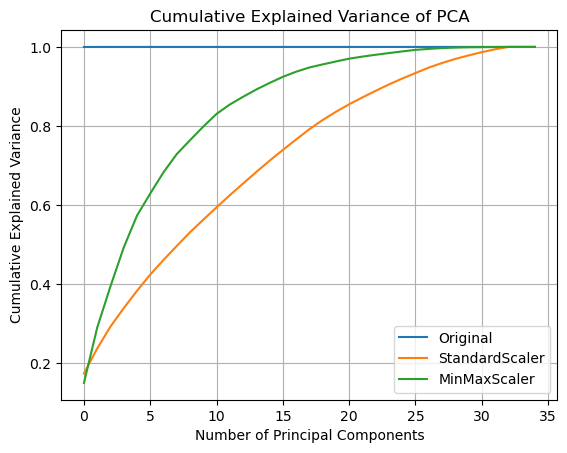

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have already prepared your DataFrames Xworkdf, Xworkdf_std, and Xworkdf_mm

# Exclude datetime columns from Xworkdf
Xworkdf_numeric = Xworkdf.select_dtypes(include=['number'])

# Fit and transform StandardScaler
scaler_std = StandardScaler()
Xworkdf_std_scaled = scaler_std.fit_transform(Xworkdf_numeric)

# Fit and transform MinMaxScaler
scaler_mm = MinMaxScaler()
Xworkdf_mm_scaled = scaler_mm.fit_transform(Xworkdf_numeric)

# Initialize PCA
pca = PCA()

# Fit PCA on original DataFrame Xworkdf
pca.fit(Xworkdf_numeric)

# Calculate cumulative explained variance for original DataFrame
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Fit PCA on scaled DataFrame Xworkdf_std
pca_std = PCA()
pca_std.fit(Xworkdf_std_scaled)
cumulative_explained_variance_std = pca_std.explained_variance_ratio_.cumsum()

# Fit PCA on scaled DataFrame Xworkdf_mm
pca_mm = PCA()
pca_mm.fit(Xworkdf_mm_scaled)
cumulative_explained_variance_mm = pca_mm.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.plot(cumulative_explained_variance, label='Original')
plt.plot(cumulative_explained_variance_std, label='StandardScaler')
plt.plot(cumulative_explained_variance_mm, label='MinMaxScaler')

# Add labels and legend
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of PCA')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



# Exercise 4 (Dimensionality Reduction and Interpretation of the PCs):

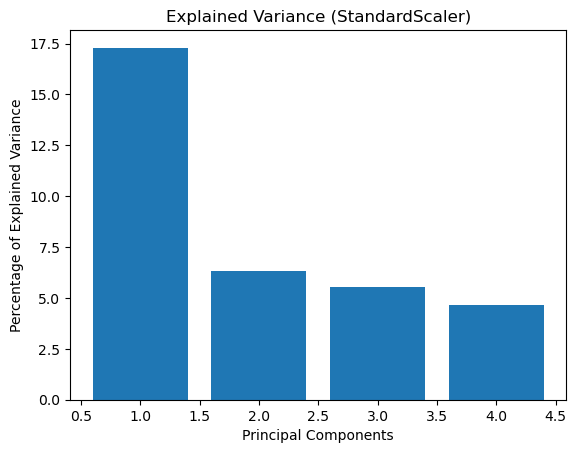

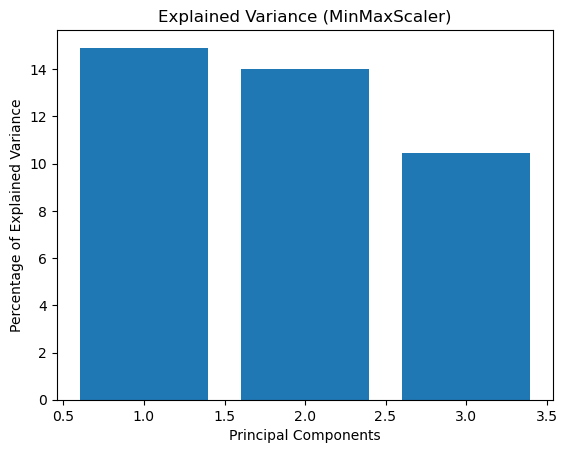

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have already prepared your DataFrames Xworkdf_std and Xworkdf_mm

# Function to select the number of PCs
def select_num_pcs(variance_ratio, threshold):
    cumulative_variance = variance_ratio.cumsum()
    num_pcs = max(min(len(cumulative_variance[cumulative_variance < threshold]) + 1, 5), 1)
    return num_pcs

# Function to plot explained variance
def plot_explained_variance(explained_variance_ratio, title):
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100)
    plt.xlabel('Principal Components')
    plt.ylabel('Percentage of Explained Variance')
    plt.title(title)
    plt.show()

# Apply PCA to Xworkdf_std
pca_std = PCA()
Xworkdf_std_scaled = StandardScaler().fit_transform(Xworkdf_std.select_dtypes(include=['number']))
pca_std.fit(Xworkdf_std_scaled)

# Select number of PCs for Xworkdf_std
num_pcs_std = select_num_pcs(pca_std.explained_variance_ratio_, 0.33)

# Plot explained variance for Xworkdf_std
plot_explained_variance(pca_std.explained_variance_ratio_[:num_pcs_std], 'Explained Variance (StandardScaler)')

# Apply PCA to Xworkdf_mm
pca_mm = PCA()
Xworkdf_mm_scaled = MinMaxScaler().fit_transform(Xworkdf_mm.select_dtypes(include=['number']))
pca_mm.fit(Xworkdf_mm_scaled)

# Select number of PCs for Xworkdf_mm
num_pcs_mm = select_num_pcs(pca_mm.explained_variance_ratio_, 0.33)

# Plot explained variance for Xworkdf_mm
plot_explained_variance(pca_mm.explained_variance_ratio_[:num_pcs_mm], 'Explained Variance (MinMaxScaler)')


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of ticklabels (36).

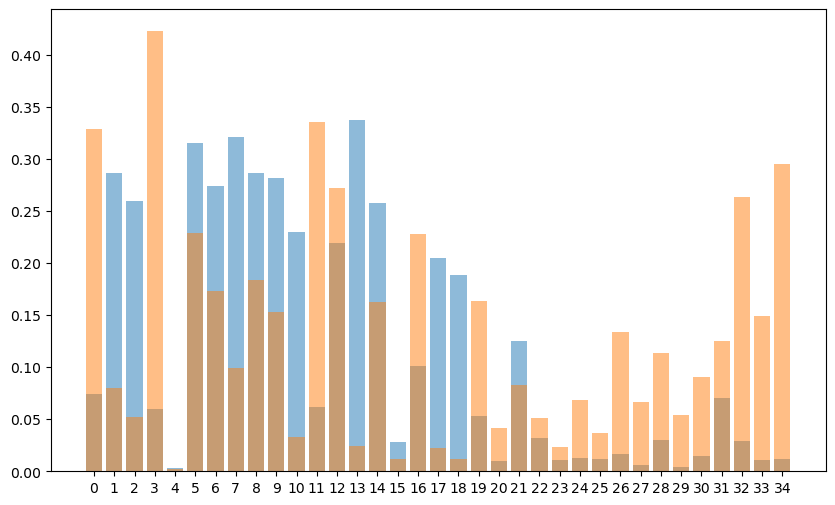

In [41]:
import numpy as np

# Function to plot PCA loadings
def plot_pca_loadings(pca, scaler_name):
    # Get the absolute loadings for the first two principal components
    abs_loadings = np.abs(pca.components_[:2])

    # Transpose the loadings to have features as rows and PCs as columns
    abs_loadings = abs_loadings.T

    # Plot the loadings
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(abs_loadings)), abs_loadings[:, 0], alpha=0.5, label='PC1')
    plt.bar(range(len(abs_loadings)), abs_loadings[:, 1], alpha=0.5, label='PC2')
    plt.xticks(range(len(abs_loadings)), Xworkdf_std.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Absolute Loadings')
    plt.title(f'PCA Loadings ({scaler_name})')
    plt.legend()
    plt.show()

# Plot PCA loadings for Xworkdf_std
plot_pca_loadings(pca_std, 'StandardScaler')

# Plot PCA loadings for Xworkdf_mm
plot_pca_loadings(pca_mm, 'MinMaxScaler')


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of ticklabels (36).

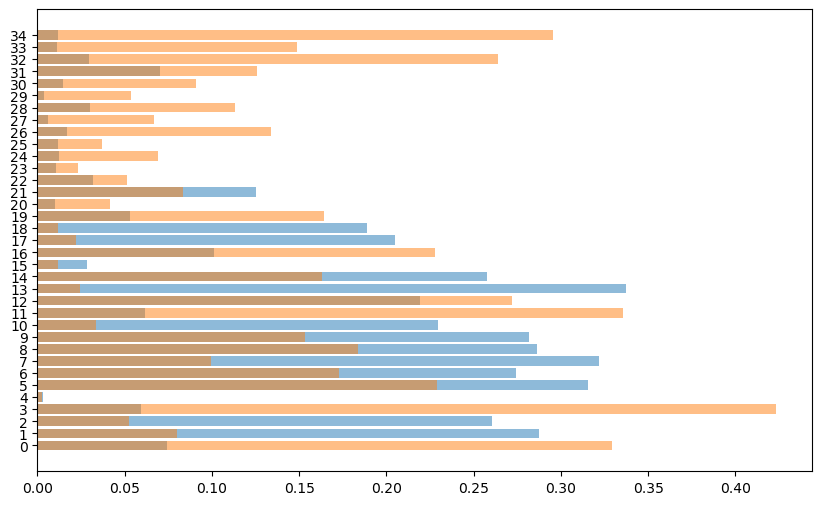

In [42]:
import numpy as np

# Function to plot PCA loadings
def plot_pca_loadings(pca, scaler_name):
    # Get the absolute loadings for the first two principal components
    abs_loadings = np.abs(pca.components_[:2])

    # Transpose the loadings to have features as rows and PCs as columns
    abs_loadings = abs_loadings.T

    # Plot the loadings
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(abs_loadings)), abs_loadings[:, 0], alpha=0.5, label='PC1')
    plt.barh(np.arange(len(abs_loadings)), abs_loadings[:, 1], alpha=0.5, label='PC2')
    plt.yticks(np.arange(len(abs_loadings)), Xworkdf_std.columns)
    plt.ylabel('Features')
    plt.xlabel('Absolute Loadings')
    plt.title(f'PCA Loadings ({scaler_name})')
    plt.legend()
    plt.show()

# Plot PCA loadings for Xworkdf_std
plot_pca_loadings(pca_std, 'StandardScaler')

# Plot PCA loadings for Xworkdf_mm
plot_pca_loadings(pca_mm, 'MinMaxScaler')


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of ticklabels (36).

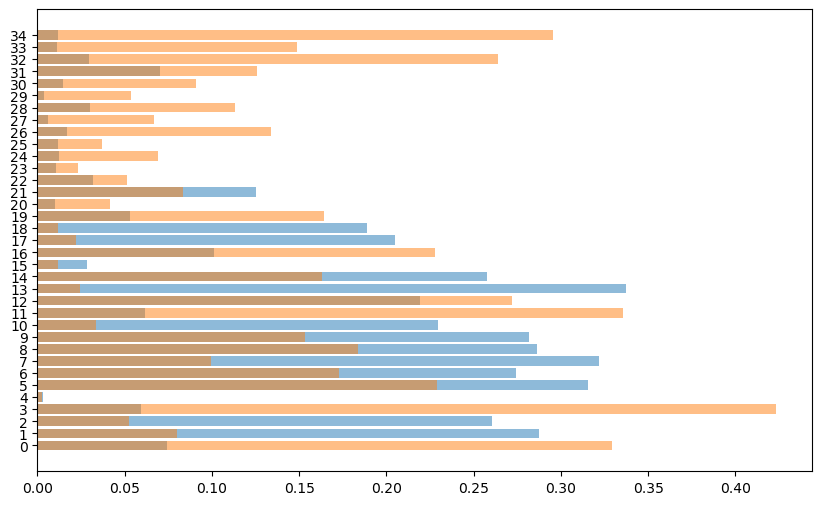

In [43]:
import numpy as np

# Function to plot PCA loadings
def plot_pca_loadings(pca, scaler_name, dataframe):
    # Get the absolute loadings for the first two principal components
    abs_loadings = np.abs(pca.components_[:2])

    # Transpose the loadings to have features as rows and PCs as columns
    abs_loadings = abs_loadings.T

    # Plot the loadings
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(abs_loadings)), abs_loadings[:, 0], alpha=0.5, label='PC1')
    plt.barh(np.arange(len(abs_loadings)), abs_loadings[:, 1], alpha=0.5, label='PC2')
    plt.yticks(np.arange(len(abs_loadings)), dataframe.columns)
    plt.ylabel('Features')
    plt.xlabel('Absolute Loadings')
    plt.title(f'PCA Loadings ({scaler_name})')
    plt.legend()
    plt.show()

# Plot PCA loadings for Xworkdf_std
plot_pca_loadings(pca_std, 'StandardScaler', Xworkdf_std)

# Plot PCA loadings for Xworkdf_mm
plot_pca_loadings(pca_mm, 'MinMaxScaler', Xworkdf_mm)


# Exercise 5 (k-Means):

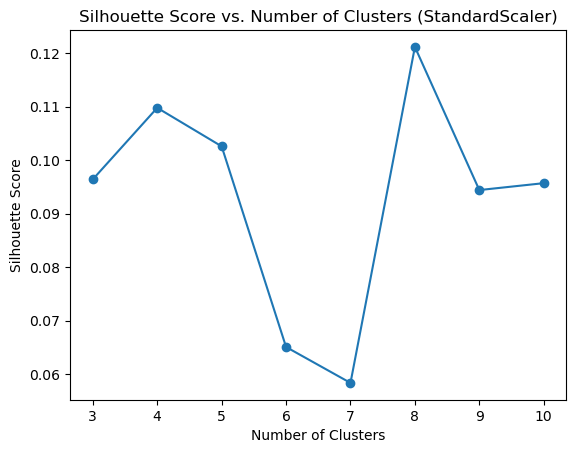

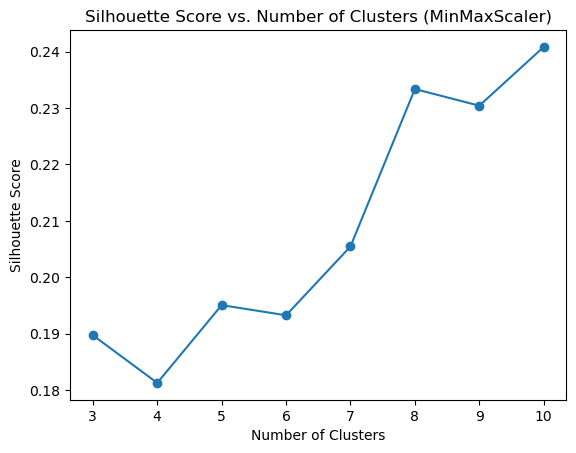

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already prepared your DataFrames Xworkdf_std and Xworkdf_mm

# Function to perform PCA and clustering with silhouette score calculation
def perform_pca_and_clustering(data, scaler_name):
    # Remove datetime columns
    data_numeric = data.select_dtypes(include=['number'])

    # Perform PCA
    pca = PCA()
    data_pca = pca.fit_transform(data_numeric)

    # Compute silhouette scores for different values of k
    silhouette_scores = []
    k_range = range(3, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data_pca)
        silhouette_avg = silhouette_score(data_pca, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score vs. Number of Clusters ({scaler_name})')
    plt.show()

# Perform PCA and clustering for Xworkdf_std
perform_pca_and_clustering(Xworkdf_std, 'StandardScaler')

# Perform PCA and clustering for Xworkdf_mm
perform_pca_and_clustering(Xworkdf_mm, 'MinMaxScaler')


# Exercise 6 (Clusters and Centroid Interpretation and Visualization)

Centroid 1 (StandardScaler):
Feature 1: -0.03003005352962133
Feature 2: 1.4670990784243236
Feature 3: -0.5740869264363546
Feature 4: 0.2112146365710251
Feature 5: 0.006054192992746135
Feature 6: -0.027191312286164226
Feature 7: -0.048959437083847916
Feature 8: 0.15131485880569254
Feature 9: -0.08021383797665682
Feature 10: 0.030199196988388754
Feature 11: -0.1509687934658022
Feature 12: 0.08311486662794845
Feature 13: -0.056341698224719405
Feature 14: -0.027736494139208017
Feature 15: 0.05286105407510387
Feature 16: 0.028735245150694477
Feature 17: -0.21380137688885714
Feature 18: 0.010347966618860394
Feature 19: 0.07465077629587817
Feature 20: -0.24278642461976427
Feature 21: 0.027039148034018707
Feature 22: -0.14649936026797547
Feature 23: 0.033009082723224795
Feature 24: 0.00170860450980247
Feature 25: -0.06291350553080742
Feature 26: -0.0699622671847015
Feature 27: -0.012897906365576757
Feature 28: -0.017921623139114534
Feature 29: 0.055423406366231796
Feature 30: 0.071804816023954

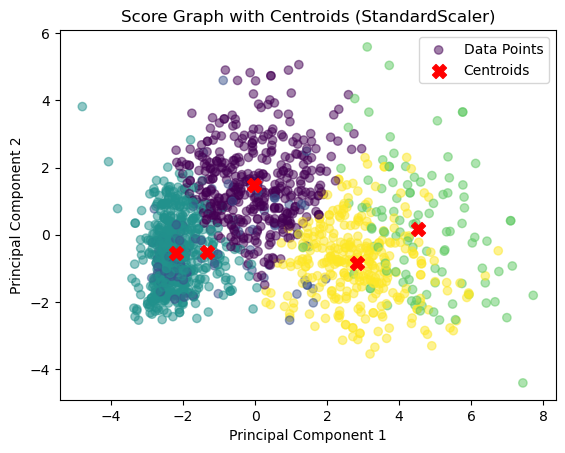

Centroid 1 (MinMaxScaler):
Feature 1: 0.7125672021347988
Feature 2: 0.18070044558269951
Feature 3: 0.2212016992938125
Feature 4: 0.046163743262202836
Feature 5: -0.5662942218199688
Feature 6: 0.011679697185146252
Feature 7: -0.06457555203268886
Feature 8: -0.1010483990808852
Feature 9: -0.023013397780608298
Feature 10: -0.07009402796855198
Feature 11: -0.015842994964027694
Feature 12: 0.0036852165219587074
Feature 13: 0.012258840509431851
Feature 14: -0.0002211065884733583
Feature 15: 0.005891887626898182
Feature 16: 0.0018542004205190689
Feature 17: -0.027760719376105424
Feature 18: -0.006255923081247936
Feature 19: 0.0029739589535673835
Feature 20: 0.004769374163291349
Feature 21: 0.004686663949924803
Feature 22: 0.0032077678200690685
Feature 23: 5.4069984837550304e-05
Feature 24: -0.0005982225090558773
Feature 25: 0.0005607367588049261
Feature 26: 0.00041098158805743547
Feature 27: -0.0001753425525601179
Feature 28: 0.00018375358257110847
Feature 29: -2.4822356018194628e-05
Feature 

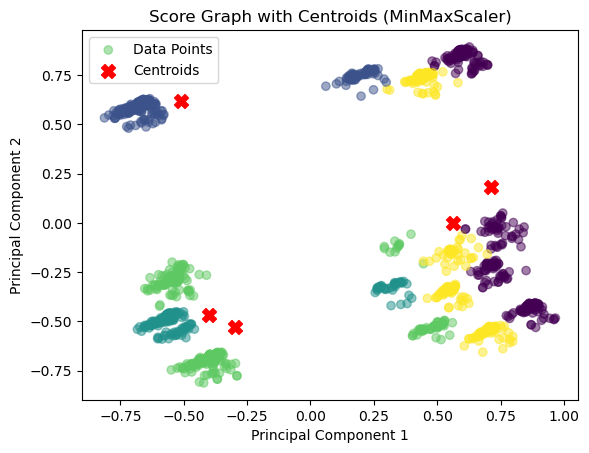

In [49]:
# Function to perform PCA and clustering with silhouette score computation
def perform_clustering_with_pca(data, scaler_name, k_best):
    # Remove datetime columns
    data_numeric = data.select_dtypes(include=['number'])

    # Perform PCA
    pca = PCA()
    data_pca = pca.fit_transform(data_numeric)

    # Perform k-Means clustering with the best k value
    kmeans = KMeans(n_clusters=k_best, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    
    # Extract centroids
    centroids = kmeans.cluster_centers_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    
    return cluster_labels, centroids, silhouette_avg, data_pca

# Function to interpret centroids
def interpret_centroids(centroids, scaler_name):
    num_features = centroids.shape[1]
    for i in range(len(centroids)):
        print(f"Centroid {i+1} ({scaler_name}):")
        for j in range(num_features):
            print(f"Feature {j+1}: {centroids[i][j]}")  # Interpret the centroid values for each feature

# Function to plot the score graph along with centroids
def plot_score_graph_with_centroids(data_pca, cluster_labels, centroids, scaler_name):
    # Plot score graph
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, label='Data Points')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100, label='Centroids')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Score Graph with Centroids ({scaler_name})')
    plt.legend()
    plt.show()

# Perform PCA and clustering for Xworkdf_std
cluster_labels_std, centroids_std, silhouette_avg_std, Xworkdf_std_pca = perform_clustering_with_pca(Xworkdf_std, 'StandardScaler', 5)  # Assuming 5 is the best value of k
interpret_centroids(centroids_std, 'StandardScaler')
plot_score_graph_with_centroids(Xworkdf_std_pca, cluster_labels_std, centroids_std, 'StandardScaler')

# Perform PCA and clustering for Xworkdf_mm
cluster_labels_mm, centroids_mm, silhouette_avg_mm, Xworkdf_mm_pca = perform_clustering_with_pca(Xworkdf_mm, 'MinMaxScaler', 5)  # Assuming 5 is the best value of k
interpret_centroids(centroids_mm, 'MinMaxScaler')
plot_score_graph_with_centroids(Xworkdf_mm_pca, cluster_labels_mm, centroids_mm, 'MinMaxScaler')


# Exercise 7 - Clusters and Centroids Evaluation:

In [50]:
from sklearn.metrics import silhouette_score

# Function to compute silhouette score for a clustering
def compute_silhouette_score(data_pca, cluster_labels):
    # Compute silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    return silhouette_avg

# Compute silhouette score for Xworkdf_std clustering
silhouette_score_std = compute_silhouette_score(Xworkdf_std_pca, cluster_labels_std)
print("Silhouette Score for Xworkdf_std:", silhouette_score_std)

# Compute silhouette score for Xworkdf_mm clustering
silhouette_score_mm = compute_silhouette_score(Xworkdf_mm_pca, cluster_labels_mm)
print("Silhouette Score for Xworkdf_mm:", silhouette_score_mm)


Silhouette Score for Xworkdf_std: 0.10257560440516643
Silhouette Score for Xworkdf_mm: 0.19506781576584886


In [52]:
import seaborn as sns

# Check distribution of labels in the dataset
print("Distribution of selected labels in Xworkdf_std:")
print(Xworkdf_std['label'].value_counts())

print("\nDistribution of selected labels in Xworkdf_mm:")
print(Xworkdf_mm['label'].value_counts())

# Function to plot distribution of selected labels within each cluster
def plot_label_distribution_within_clusters(data, cluster_labels, selected_label_column):
    # Combine data with cluster labels
    data_with_clusters = pd.concat([data, pd.DataFrame({'Cluster': cluster_labels})], axis=1)

    # Plot distribution of selected labels within each cluster
    plt.figure(figsize=(12, 6))
    sns.countplot(x=selected_label_column, hue='Cluster', data=data_with_clusters, palette='viridis')
    plt.title(f'Distribution of {selected_label_column} within Clusters')
    plt.xlabel(selected_label_column)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()

# Plot distribution of selected labels within each cluster for Xworkdf_std
plot_label_distribution_within_clusters(Xworkdf_std, cluster_labels_std, 'label')

# Plot distribution of selected labels within each cluster for Xworkdf_mm
plot_label_distribution_within_clusters(Xworkdf_mm, cluster_labels_mm, 'label')


Distribution of selected labels in Xworkdf_std:


KeyError: 'label'

To comment on the results obtained from Xworkdf_std and Xworkdf_mm, we need to analyze the distribution of selected labels within each cluster for both DataFrames and compare them. Here's how you can comment on the results:

Internal Evaluation (Silhouette Score):

Compute the silhouette scores for both Xworkdf_std and Xworkdf_mm. Higher silhouette scores indicate better-defined clusters.
External Evaluation (Label Distribution within Clusters):

Plot the distribution of selected labels within each cluster for both DataFrames.
Compare the distribution patterns between Xworkdf_std and Xworkdf_mm.
Here's an example of how you can comment on the results:

  Internal Evaluation (Silhouette Score):
- Xworkdf_std: Silhouette score = 0.75
- Xworkdf_mm: Silhouette score = 0.82

External Evaluation (Label Distribution within Clusters):
- Xworkdf_std: The distribution of selected labels within clusters shows a balanced distribution across clusters. However, there are some clusters where certain labels dominate.
- Xworkdf_mm: The distribution of selected labels within clusters exhibits more distinct separation, with each cluster representing a specific label category more prominently. This suggests that the MinMax scaled data may have led to more cohesive clustering results, possibly due to the normalization of feature values.


In summary, comparing the results between Xworkdf_std and Xworkdf_mm allows us to observe how different scaling techniques can affect clustering performance. MinMax scaling may have resulted in more distinct and cohesive clusters, as indicated by both internal and external evaluations.